<a href="https://colab.research.google.com/github/kiril-buga/Neural-Network-Training-Project/blob/main/1D_CNN_Multilabel_V2/Y_1d_CNN_5_Labels_v02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

## 📚 Quick Start Guide

### First Time Setup:
1. **Run all cells in order** from top to bottom
2. **Configure settings** in the Configuration section (Cell 3-4)
   - Set `TOTAL_EPOCHS`, `BATCH_SIZE`, etc.
   - Enable `UPLOAD_TO_HF` if you want automatic checkpoint uploads
3. **Optional**: Run the HuggingFace login cell if uploading checkpoints

### To Resume Training:
1. Set `RESUME_FROM_CHECKPOINT = True` in configuration
2. Set `CHECKPOINT_TO_LOAD` to your checkpoint file (e.g., "checkpoint_epoch_025.pkl")
3. If checkpoint is on HuggingFace, set `DOWNLOAD_FROM_HF = True`
4. Run all cells from configuration onwards

### To Change Model Architecture:
Edit these variables in the Configuration section:
- `CONV_FILTERS = [32, 64, 128, 256]` - Number of filters per conv block
- `KERNEL_SIZE = 3` - Convolution kernel size
- `DROPOUT_CONV = 0.2` - Dropout rate after convolutions
- `DROPOUT_DENSE = 0.3` - Dropout rate in dense layers
- `DENSE_LAYERS = [256, 128]` - Dense layer sizes

### Troubleshooting:
- **Out of memory**: Reduce `BATCH_SIZE`
- **Training too slow**: Increase `BATCH_SIZE` (if memory allows)
- **Overfitting**: Increase `DROPOUT_CONV` and `DROPOUT_DENSE`
- **Underfitting**: Decrease dropout or train more epochs

In [23]:
# ============================================================================
# 🔧 MASTER CONFIGURATION - Edit these values to customize training
# ============================================================================

# === PATHS ===
DATA_DIR_NAME = "multilabel_v2"
RESULTS_DIR = "./results/"
CHECKPOINT_DIR = "./checkpoints/"

# === HUGGING FACE ===
HF_USERNAME = "kiril-buga"
HF_DATASET_REPO = "kiril-buga/ECG-database"
HF_MODEL_REPO = "Neural-Network-Project/ECG-models"  # Single source of truth
UPLOAD_TO_HF = True  # Set True to auto-upload checkpoints during training
DOWNLOAD_FROM_HF = False  # Set True to download checkpoint from HuggingFace

# === TRAINING PARAMETERS ===
BATCH_SIZE = 128
TOTAL_EPOCHS = 100
LEARNING_RATE = 1e-3
RANDOM_SEED = 44

# === CHECKPOINT SETTINGS ===
RESUME_FROM_CHECKPOINT = True  # Set True to resume from a checkpoint
CHECKPOINT_TO_LOAD = "checkpoint_epoch_045.pkl"  # Which checkpoint to load
CHECKPOINT_FREQ = 5  # Save checkpoint every N epochs
CHECKPOINT_KEEP_LAST = 3  # Keep only last N checkpoints to save space

# === DATA SPLITS ===
TEST_SIZE = 0.1  # 20% of data for test set
VAL_SIZE = 0.25  # 25% of remaining data for validation

# === MODEL ARCHITECTURE ===
CONV_FILTERS = [32, 64, 128, 256]  # Number of filters per conv block
KERNEL_SIZE = 3  # Kernel size for all conv layers
DROPOUT_CONV = 0.2  # Dropout rate after conv blocks
DROPOUT_DENSE = 0.3  # Dropout rate in dense layers
DENSE_LAYERS = [256, 128]  # Dense layer sizes before output

# === TRAINING CALLBACKS ===
EARLY_STOPPING_PATIENCE = 10  # Stop if no improvement for N epochs
REDUCE_LR_FACTOR = 0.5  # Multiply LR by this factor when reducing
REDUCE_LR_PATIENCE = 5  # Reduce LR if no improvement for N epochs
MIN_LEARNING_RATE = 1e-6  # Minimum learning rate

# === THRESHOLD OPTIMIZATION ===
DEFAULT_THRESHOLD = 0.5  # Default classification threshold
MIN_RECALL_TARGETS = {  # Minimum recall targets per disease
    'Myocarditis': 0.80,
    'Cardiomyopathy': 0.85,
    'Kawasaki': 0.85,
    'CHD': 0.80,
    'Healthy': 0.95
}
THRESHOLD_SEARCH_START = 0.1  # Start of threshold search range
THRESHOLD_SEARCH_END = 0.91  # End of threshold search range
THRESHOLD_SEARCH_STEP = 0.01  # Step size for threshold search

# === VISUALIZATION ===
DPI = 150  # DPI for saved figures
FIGSIZE_LARGE = (16, 12)  # Figure size for large plots
FIGSIZE_MEDIUM = (14, 5)  # Figure size for medium plots
FIGSIZE_ROC = (15, 10)  # Figure size for ROC curves

# ============================================================================
# Print configuration summary
# ============================================================================
print("="*80)
print("CONFIGURATION SUMMARY")
print("="*80)
print(f"\n📁 Paths:")
print(f"  Data directory: {DATA_DIR_NAME}")
print(f"  Results: {RESULTS_DIR}")
print(f"  Checkpoints: {CHECKPOINT_DIR}")
print(f"\n🤗 Hugging Face:")
print(f"  Dataset repo: {HF_DATASET_REPO}")
print(f"  Model repo: {HF_MODEL_REPO}")
if UPLOAD_TO_HF:
    print(f"  ⚠️  Make sure repo exists: https://huggingface.co/{HF_MODEL_REPO}")
print(f"  Auto-upload: {UPLOAD_TO_HF}")
print(f"\n🎯 Training:")
print(f"  Batch size: {BATCH_SIZE}")
print(f"  Total epochs: {TOTAL_EPOCHS}")
print(f"  Learning rate: {LEARNING_RATE}")
print(f"  Random seed: {RANDOM_SEED}")
print(f"\n💾 Checkpoints:")
print(f"  Resume training: {RESUME_FROM_CHECKPOINT}")
if RESUME_FROM_CHECKPOINT:
    print(f"  Load from: {CHECKPOINT_TO_LOAD}")
    print(f"  Download from HF: {DOWNLOAD_FROM_HF}")
print(f"  Save frequency: every {CHECKPOINT_FREQ} epochs")
print(f"  Keep last: {CHECKPOINT_KEEP_LAST} checkpoints")
print(f"\n🏗️ Model Architecture:")
print(f"  Conv filters: {CONV_FILTERS}")
print(f"  Kernel size: {KERNEL_SIZE}")
print(f"  Dropout (conv): {DROPOUT_CONV}")
print(f"  Dropout (dense): {DROPOUT_DENSE}")
print(f"  Dense layers: {DENSE_LAYERS}")
print("\n" + "="*80)

CONFIGURATION SUMMARY

📁 Paths:
  Data directory: multilabel_v2
  Results: ./results/
  Checkpoints: ./checkpoints/

🤗 Hugging Face:
  Dataset repo: kiril-buga/ECG-database
  Model repo: Neural-Network-Project/ECG-models
  ⚠️  Make sure repo exists: https://huggingface.co/Neural-Network-Project/ECG-models
  Auto-upload: True

🎯 Training:
  Batch size: 128
  Total epochs: 100
  Learning rate: 0.001
  Random seed: 44

💾 Checkpoints:
  Resume training: True
  Load from: checkpoint_epoch_045.pkl
  Download from HF: False
  Save frequency: every 5 epochs
  Keep last: 3 checkpoints

🏗️ Model Architecture:
  Conv filters: [32, 64, 128, 256]
  Kernel size: 3
  Dropout (conv): 0.2
  Dropout (dense): 0.3
  Dense layers: [256, 128]



## Environment & Data Loading

In [24]:
!pip install tensorflow scikit-learn matplotlib seaborn huggingface-hub h5py -q

import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    hamming_loss, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc, confusion_matrix,
    accuracy_score, jaccard_score
)




In [25]:
# Apply random seed configuration for reproducibility
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Create directories
os.makedirs(RESULTS_DIR, exist_ok=True)
os.makedirs(CHECKPOINT_DIR, exist_ok=True)

print(f"✓ Random seed set to: {RANDOM_SEED}")
print(f"✓ TensorFlow version: {tf.__version__}")
print(f"✓ GPU devices: {tf.config.list_physical_devices('GPU')}")
print(f"✓ Directories created: {RESULTS_DIR}, {CHECKPOINT_DIR}")

✓ Random seed set to: 44
✓ TensorFlow version: 2.19.0
✓ GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
✓ Directories created: ./results/, ./checkpoints/


In [26]:
# Login to HuggingFace (matches preprocessing approach)
if UPLOAD_TO_HF:
    from huggingface_hub import login
    print("Logging into Hugging Face...")
    login()
    print("Logged in!")
    print(f"Will upload to: {HF_MODEL_REPO}")
else:
    print("Skipping HF login (UPLOAD_TO_HF = False)")


Logging into Hugging Face...


Logged in!
Will upload to: Neural-Network-Project/ECG-models


### Create Data Streaming


In [27]:
def create_dataset(h5_path, indices, batch_size=32, is_training=True):
    """Create streaming dataset from HDF5.

    NOTE: HDF5 requires indices in increasing order for fancy indexing.
    We sort indices before access and unsort after to maintain shuffling.
    """
    def gen():
        with h5py.File(h5_path, 'r') as h5f:
            X_dset = h5f['X']
            y_dset = h5f['y']

            # Shuffle for training, don't shuffle for val/test
            idx = np.random.permutation(indices) if is_training else indices

            for i in range(0, len(idx), batch_size):
                batch_idx = idx[i:i+batch_size]

                # HDF5 requires sorted indices for fancy indexing
                # So we sort, access, then unsort to maintain shuffle
                batch_idx_sorted = np.sort(batch_idx)
                X_batch = X_dset[batch_idx_sorted]
                y_batch = y_dset[batch_idx_sorted]

                # Create unsort permutation to restore original shuffle order
                unsort_idx = np.argsort(np.argsort(batch_idx))
                X_batch = X_batch[unsort_idx]
                y_batch = y_batch[unsort_idx]

                # Convert float16 to float32 if needed
                if X_batch.dtype == np.float16:
                    X_batch = X_batch.astype(np.float32)

                yield X_batch, y_batch

    dataset = tf.data.Dataset.from_generator(
        gen,
        output_signature=(
            tf.TensorSpec(shape=(None, *input_shape), dtype=tf.float32),
            tf.TensorSpec(shape=(None, len(DISEASE_CLASSES)), dtype=tf.int32)
        )
    )

    return dataset.prefetch(tf.data.AUTOTUNE)

# Create datasets


### Get HF Data


In [28]:
# Download preprocessed data from Hugging Face
from huggingface_hub import snapshot_download
import h5py
import tensorflow as tf

print("Downloading preprocessed data from Hugging Face...")
local_dir = snapshot_download(
    repo_id=HF_DATASET_REPO,
    repo_type="dataset",
    local_dir="./ECG-database/",
    allow_patterns=[f"{DATA_DIR_NAME}/*"]
)

DATA_DIR = os.path.join(local_dir, DATA_DIR_NAME)
CHECKPOINT_DIR = "./checkpoints/"
os.makedirs(CHECKPOINT_DIR, exist_ok=True)

# ============================================================================
# Memory-efficient HDF5 dataset loader
h5_path = os.path.join(DATA_DIR, "ecg_data.h5")

print(f"\nOpening HDF5 file: {h5_path}")

# Get metadata without loading data
with h5py.File(h5_path, 'r') as h5f:
    n_samples = h5f['X'].shape[0]
    input_shape = h5f['X'].shape[1:]
    n_classes = h5f['y'].shape[1]
    DISEASE_CLASSES = list(h5f.attrs['disease_classes'])

    # Load only labels for distribution check (small)
    y_labels = h5f['y'][:]

print(f"  Total samples: {n_samples}")
print(f"  Input shape: {input_shape}")
print(f"  Classes: {DISEASE_CLASSES}")

print("\nClass distribution:")
for i, cls in enumerate(DISEASE_CLASSES):
    count = y_labels[:, i].sum()
    percentage = (count / n_samples) * 100
    print(f"  {cls}: {count} ({percentage:.1f}%)")

del y_labels  # Free memory


# ============================================================================
# HDF5 Generator for memory-efficient data loading
class HDF5Generator:
    """Memory-efficient generator that reads from HDF5 in batches."""

    def __init__(self, h5_path, x_key, y_key, indices=None, batch_size=32, shuffle=False):
        self.h5_path = h5_path
        self.x_key = x_key
        self.y_key = y_key
        self.batch_size = batch_size
        self.shuffle = shuffle

        with h5py.File(h5_path, 'r') as h5f:
            self.x_shape = h5f[x_key].shape[1:]
            self.y_shape = h5f[y_key].shape[1:]
            total_samples = h5f[x_key].shape[0]

        self.indices = indices if indices is not None else np.arange(total_samples)
        self.n_samples = len(self.indices)

    def __len__(self):
        return (self.n_samples + self.batch_size - 1) // self.batch_size

    def __call__(self):
        indices = self.indices.copy()
        if self.shuffle:
            np.random.shuffle(indices)

        with h5py.File(self.h5_path, 'r') as h5f:
            for start in range(0, self.n_samples, self.batch_size):
                end = min(start + self.batch_size, self.n_samples)
                batch_indices = indices[start:end]

                # Sort for faster HDF5 read
                sorted_idx = np.argsort(batch_indices)
                sorted_batch = batch_indices[sorted_idx]

                X_batch = h5f[self.x_key][sorted_batch]
                y_batch = h5f[self.y_key][sorted_batch]

                # Restore original order if shuffled
                if self.shuffle:
                    restore_idx = np.argsort(sorted_idx)
                    X_batch = X_batch[restore_idx]
                    y_batch = y_batch[restore_idx]

                yield X_batch.astype(np.float32), y_batch.astype(np.float32)


def create_dataset_from_hdf5(h5_path, x_key, y_key, indices=None, batch_size=32, shuffle=False):
    """Create tf.data.Dataset from HDF5 file."""
    gen = HDF5Generator(h5_path, x_key, y_key, indices, batch_size, shuffle)

    dataset = tf.data.Dataset.from_generator(
        gen,
        output_signature=(
            tf.TensorSpec(shape=(None,) + gen.x_shape, dtype=tf.float32),
            tf.TensorSpec(shape=(None,) + gen.y_shape, dtype=tf.float32)
        )
    )
    return dataset.prefetch(tf.data.AUTOTUNE)


# ============================================================================
# Create train/val/test splits
from sklearn.model_selection import train_test_split

print("\nCreating train/val/test splits...")

with h5py.File(h5_path, 'r') as h5f:
    y_all = h5f['y'][:]

indices = np.arange(n_samples)
y_class = y_all.argmax(axis=1)

idx_temp, idx_test = train_test_split(indices, test_size=0.2, stratify=y_class, random_state=42)
idx_train, idx_val = train_test_split(idx_temp, test_size=0.25, stratify=y_all[idx_temp].argmax(axis=1), random_state=42)

print(f"  Train: {len(idx_train)}, Val: {len(idx_val)}, Test: {len(idx_test)}")

del y_all, y_class  # Free memory


# ============================================================================
# Create datasets
print("\nCreating tf.data.Dataset from HDF5 (memory-efficient)...")

train_dataset = create_dataset_from_hdf5(h5_path, 'X', 'y', idx_train, BATCH_SIZE, shuffle=True)
val_dataset = create_dataset_from_hdf5(h5_path, 'X', 'y', idx_val, BATCH_SIZE, shuffle=False)
test_dataset = create_dataset_from_hdf5(h5_path, 'X', 'y', idx_test, BATCH_SIZE, shuffle=False)

# Verify dataset contents
print("\nVerifying datasets...")
for batch_X, batch_y in train_dataset.take(1):
    print(f"  Sample batch - X shape: {batch_X.shape}, y shape: {batch_y.shape}")
    print(f"  X dtype: {batch_X.dtype}, y dtype: {batch_y.dtype}")

print("\nData loading complete!")

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]


Opening HDF5 file: /content/ECG-database/multilabel_v2/ecg_data.h5
  Total samples: 59944
  Input shape: (5000, 12)
  Classes: ['Myocarditis', 'Cardiomyopathy', 'Kawasaki', 'CHD', 'Healthy']

Class distribution:
  Myocarditis: 2076 (3.5%)
  Cardiomyopathy: 267 (0.4%)
  Kawasaki: 313 (0.5%)
  CHD: 5290 (8.8%)
  Healthy: 51998 (86.7%)

Creating train/val/test splits...
  Train: 35966, Val: 11989, Test: 11989

Creating tf.data.Dataset from HDF5 (memory-efficient)...

Verifying datasets...
  Sample batch - X shape: (128, 5000, 12), y shape: (128, 5)
  X dtype: <dtype: 'float32'>, y dtype: <dtype: 'float32'>

Data loading complete!


## Build & Train Model

In [29]:
def focal_loss(gamma=2.0, alpha=0.25):
    """
    Focal loss for multi-label classification.

    Focal loss down-weights easy examples and focuses on hard negatives.
    This helps with class imbalance by giving more weight to minority classes.

    Parameters:
    - gamma: focusing parameter (default 2.0). Higher = more focus on hard examples
    - alpha: weighting factor for positive class (default 0.25)

    Returns:
    - loss function compatible with Keras model.compile()
    """
    def loss(y_true, y_pred):
        # Clip predictions to prevent log(0)
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1 - 1e-7)

        # Binary cross entropy
        bce = -y_true * tf.math.log(y_pred) - (1 - y_true) * tf.math.log(1 - y_pred)

        # Focal weight: (1 - p_t)^gamma
        # For correct predictions (p_t close to 1), weight is small
        # For wrong predictions (p_t close to 0), weight is large
        p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        focal_weight = (1 - p_t) ** gamma

        # Alpha weighting: balance positive/negative examples
        alpha_weight = y_true * alpha + (1 - y_true) * (1 - alpha)

        return tf.reduce_mean(alpha_weight * focal_weight * bce)

    return loss

print("Focal loss function defined")
print(f"  Gamma (focusing): {2.0}")
print(f"  Alpha (weighting): {0.25}")


Focal loss function defined
  Gamma (focusing): 2.0
  Alpha (weighting): 0.25


In [30]:
# Build multi-label 1D CNN model
def build_model(input_shape, num_classes):
        return keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv1D(CONV_FILTERS[0], KERNEL_SIZE, padding='same', activation='relu'),
        layers.Conv1D(CONV_FILTERS[0], KERNEL_SIZE, padding='same', activation='relu'),
        layers.MaxPooling1D(2),
        layers.Dropout(DROPOUT_CONV),
        layers.Conv1D(CONV_FILTERS[1], KERNEL_SIZE, padding='same', activation='relu'),
        layers.Conv1D(CONV_FILTERS[1], KERNEL_SIZE, padding='same', activation='relu'),
        layers.MaxPooling1D(2),
        layers.Dropout(DROPOUT_CONV),
        layers.Conv1D(CONV_FILTERS[2], KERNEL_SIZE, padding='same', activation='relu'),
        layers.Conv1D(CONV_FILTERS[2], KERNEL_SIZE, padding='same', activation='relu'),
        layers.MaxPooling1D(2),
        layers.Dropout(DROPOUT_CONV),
        layers.Conv1D(CONV_FILTERS[3], KERNEL_SIZE, padding='same', activation='relu'),
        layers.Conv1D(CONV_FILTERS[3], KERNEL_SIZE, padding='same', activation='relu'),
        layers.MaxPooling1D(2),
        layers.Dropout(DROPOUT_CONV),
        layers.GlobalAveragePooling1D(),
        layers.Dense(DENSE_LAYERS[0], activation='relu'),
        layers.Dropout(DROPOUT_DENSE),
        layers.Dense(DENSE_LAYERS[1], activation='relu'),
        layers.Dropout(DROPOUT_DENSE),
        layers.Dense(num_classes, activation='sigmoid')  # Multi-label: sigmoid
    ])

print("Building model...")
model = build_model(input_shape, len(DISEASE_CLASSES))

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',  # Multi-label loss
    metrics=['binary_accuracy']
)

print("✓ Model built")
model.summary()

Building model...
✓ Model built


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_16 (Conv1D)              │ (None, 5000, 32)       │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 5000, 32)       │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 2500, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 2500, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_18 (Conv1D)              │ (None, 2500, 64)       │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 2500, 64)       │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 1250, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 1250, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_20 (Conv1D)              │ (None, 1250, 128)      │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_21 (Conv1D)              │ (None, 1250, 128)      │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 625, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 625, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_22 (Conv1D)              │ (None, 625, 256)       │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_23 (Conv1D)              │ (None, 625, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 312, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 312, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 256)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 491,589 (1.88 MB)

 Trainable params: 491,589 (1.88 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# ============================================================================
# BUILD MODEL AND OPTIONALLY LOAD CHECKPOINT
# ============================================================================

# Build model
print("Building model...")
model = build_model(input_shape, len(DISEASE_CLASSES))

# Create optimizer
optimizer = keras.optimizers.Adam(learning_rate=1e-3)

# Compile model
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

print("✓ Model built and compiled")
model.summary()

# Variables to track training state
initial_epoch = 0
loaded_history = None

# Load checkpoint if resuming
if RESUME_FROM_CHECKPOINT:
    print("\n" + "="*80)
    print("LOADING CHECKPOINT TO RESUME TRAINING")
    print("="*80)

    checkpoint_path = os.path.join(CHECKPOINT_DIR, CHECKPOINT_TO_LOAD)

    # Download from Hugging Face if requested
    if DOWNLOAD_FROM_HF:
        try:
            checkpoint_path = download_from_huggingface(
                HF_MODEL_REPO,
                CHECKPOINT_TO_LOAD,
                CHECKPOINT_DIR
            )
        except Exception as e:
            print(f"Failed to download from HF: {e}")
            print("Trying local checkpoint...")

    # Load the checkpoint
    if os.path.exists(checkpoint_path):
        try:
            initial_epoch, loaded_history = load_checkpoint(checkpoint_path, model, optimizer)
            print(f"\n✓ Successfully loaded checkpoint!")
            print(f"  Resuming from epoch: {initial_epoch}")
            print(f"  Will train until epoch: {TOTAL_EPOCHS}")
            print(f"  Remaining epochs: {TOTAL_EPOCHS - initial_epoch}")

            # Print last few training metrics
            if loaded_history:
                print(f"\n  Last training metrics:")
                print(f"    Loss: {loaded_history['loss'][-1]:.4f}")
                print(f"    Val Loss: {loaded_history['val_loss'][-1]:.4f}")
                print(f"    Accuracy: {loaded_history['binary_accuracy'][-1]:.4f}")
                print(f"    Val Accuracy: {loaded_history['val_binary_accuracy'][-1]:.4f}")
        except Exception as e:
            print(f"✗ Failed to load checkpoint: {e}")
            print("Starting training from scratch...")
            initial_epoch = 0
            loaded_history = None
    else:
        print(f"✗ Checkpoint not found: {checkpoint_path}")
        print("Starting training from scratch...")
        initial_epoch = 0
        loaded_history = None

print("\n" + "="*80)

Building model...
✓ Model built and compiled


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_24 (Conv1D)              │ (None, 5000, 32)       │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_25 (Conv1D)              │ (None, 5000, 32)       │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 2500, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 2500, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_26 (Conv1D)              │ (None, 2500, 64)       │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_27 (Conv1D)              │ (None, 2500, 64)       │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 1250, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 1250, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_28 (Conv1D)              │ (None, 1250, 128)      │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_29 (Conv1D)              │ (None, 1250, 128)      │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 625, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 625, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_30 (Conv1D)              │ (None, 625, 256)       │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_31 (Conv1D)              │ (None, 625, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_15 (MaxPooling1D) │ (None, 312, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 312, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_3      │ (None, 256)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 491,589 (1.88 MB)

 Trainable params: 491,589 (1.88 MB)

 Non-trainable params: 0 (0.00 B)


LOADING CHECKPOINT TO RESUME TRAINING
Loading checkpoint from ./checkpoints/checkpoint_epoch_045.pkl...
Note: No optimizer weights in checkpoint (will restart optimizer)
✓ Checkpoint loaded: epoch 45

✓ Successfully loaded checkpoint!
  Resuming from epoch: 45
  Will train until epoch: 100
  Remaining epochs: 55

  Last training metrics:
    Loss: 0.0320
    Val Loss: 0.0822
    Accuracy: 0.9892
    Val Accuracy: 0.9779



In [32]:
# Checkpoint utility functions
import pickle
from huggingface_hub import HfApi, hf_hub_download
from pathlib import Path

def save_checkpoint(model, optimizer, epoch, history, checkpoint_path):
    """
    Save a complete training checkpoint including:
    - Model weights
    - Optimizer state (for proper training resumption)
    - Current epoch number
    - Training history
    """
    print(f"Saving checkpoint to {checkpoint_path}...")

    # Check if optimizer has been built (has weights)
    try:
        optimizer_weights = optimizer.get_weights()
        has_optimizer_weights = True
    except (AttributeError, ValueError):
        # Optimizer not built yet or no weights
        optimizer_weights = None
        has_optimizer_weights = False
        print("  Note: Optimizer weights not available yet (first epoch not complete)")

    # Save everything as a dictionary
    checkpoint = {
        'epoch': epoch,
        'model_weights': model.get_weights(),
        'optimizer_config': optimizer.get_config(),
        'optimizer_weights': optimizer_weights,
        'has_optimizer_weights': has_optimizer_weights,
        'history': history
    }

    with open(checkpoint_path, "wb") as f:
        pickle.dump(checkpoint, f)

    # Also save the model separately in Keras format (more portable)
    model_path = checkpoint_path.replace(".pkl", ".keras")
    model.save(model_path)

    print(f"✓ Checkpoint saved: {checkpoint_path}")
    print(f"✓ Model saved: {model_path}")

    return checkpoint_path, model_path


def load_checkpoint(checkpoint_path, model, optimizer):
    """
    Load a complete training checkpoint and restore training state.

    Returns:
        tuple: (epoch, history) - Resume from this epoch with this history
    """
    print(f"Loading checkpoint from {checkpoint_path}...")

    with open(checkpoint_path, "rb") as f:
        checkpoint = pickle.load(f)

    # Restore model weights
    model.set_weights(checkpoint["model_weights"])

    # Restore optimizer state if available
    if checkpoint.get("has_optimizer_weights", False) and checkpoint["optimizer_weights"] is not None:
        # Requires a dummy training step first to initialize optimizer variables
        dummy_batch = tf.zeros((1, *input_shape))
        with tf.GradientTape() as tape:
            _ = model(dummy_batch, training=True)
            dummy_loss = tf.reduce_mean(model.losses) if model.losses else tf.constant(0.0)

        grads = tape.gradient(dummy_loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        # Now we can restore optimizer weights
        try:
            optimizer.set_weights(checkpoint["optimizer_weights"])
            print("✓ Optimizer state restored")
        except Exception as e:
            print(f"Warning: Could not restore optimizer weights: {e}")
    else:
        print("Note: No optimizer weights in checkpoint (will restart optimizer)")

    print(f"✓ Checkpoint loaded: epoch {checkpoint['epoch']}")

    return checkpoint["epoch"], checkpoint["history"]


def upload_to_huggingface(file_path, repo_id, path_in_repo=None, token=None):
    """
    Upload file to HuggingFace Hub (matches working preprocessing approach).
    Repository must exist before uploading.
    """
    from huggingface_hub import HfApi
    from pathlib import Path

    if path_in_repo is None:
        path_in_repo = Path(file_path).name

    print(f"Uploading {file_path} to {repo_id}/{path_in_repo}...")

    api = HfApi()
    api.upload_file(
        path_or_fileobj=file_path,
        path_in_repo=path_in_repo,
        repo_id=repo_id,
        repo_type="model"
    )

    print(f"Uploaded to: https://huggingface.co/{repo_id}")
    print(f"  File: {path_in_repo}")



def download_from_huggingface(repo_id, filename, local_dir="./checkpoints/", token=None):
    """
    Download a file from Hugging Face Hub.

    Args:
        repo_id: Hugging Face repo ID (e.g., "username/model-name")
        filename: Name of file to download
        local_dir: Local directory to save to
        token: HF token (will use HF_TOKEN env variable if not provided)

    Returns:
        str: Path to downloaded file
    """
    print(f"Downloading {filename} from {repo_id}...")

    try:
        file_path = hf_hub_download(
            repo_id=repo_id,
            filename=filename,
            repo_type="model",
            local_dir=local_dir,
            token=token
        )

        print(f"✓ Downloaded to: {file_path}")
        return file_path

    except Exception as e:
        print(f"✗ Download failed: {e}")
        raise


print("✓ Checkpoint management functions loaded")


✓ Checkpoint management functions loaded


In [33]:
# Custom callback for periodic checkpoint saving and HF upload
class CheckpointAndUploadCallback(keras.callbacks.Callback):
    """
    Custom callback that:
    1. Saves complete checkpoints every N epochs
    2. Optionally uploads to Hugging Face Hub
    3. Keeps only the last K checkpoints to save space
    """

    def __init__(self, checkpoint_dir, save_freq=5, upload_to_hf=False,
                 hf_repo_id=None, keep_last=3):
        """
        Args:
            checkpoint_dir: Directory to save checkpoints
            save_freq: Save checkpoint every N epochs
            upload_to_hf: Whether to upload to Hugging Face Hub
            hf_repo_id: Hugging Face repo ID (required if upload_to_hf=True)
            keep_last: Keep only the last N checkpoints (None = keep all)
        """
        super().__init__()
        self.checkpoint_dir = checkpoint_dir
        self.save_freq = save_freq
        self.upload_to_hf = upload_to_hf
        self.hf_repo_id = hf_repo_id
        self.keep_last = keep_last
        self.checkpoints = []  # List of (epoch, checkpoint_path, model_path)

    def on_epoch_end(self, epoch, logs=None):
        # Save checkpoint every save_freq epochs
        if (epoch + 1) % self.save_freq == 0:
            checkpoint_path = os.path.join(
                self.checkpoint_dir,
                f"checkpoint_epoch_{epoch+1:03d}.pkl"
            )

            # Convert history to dictionary format
            history_dict = {k: v for k, v in self.model.history.history.items()}

            # Save checkpoint
            checkpoint_path, model_path = save_checkpoint(
                self.model,
                self.model.optimizer,
                epoch + 1,
                history_dict,
                checkpoint_path
            )

            self.checkpoints.append((epoch + 1, checkpoint_path, model_path))

            # Upload to Hugging Face if enabled
            if self.upload_to_hf and self.hf_repo_id:
                try:
                    print(f"Uploading checkpoint to Hugging Face...")
                    upload_to_huggingface(checkpoint_path, self.hf_repo_id)
                    upload_to_huggingface(model_path, self.hf_repo_id)
                except Exception as e:
                    print(f"Warning: HF upload failed: {e}")

            # Clean up old checkpoints if keep_last is set
            if self.keep_last and len(self.checkpoints) > self.keep_last:
                old_epoch, old_checkpoint, old_model = self.checkpoints.pop(0)
                try:
                    if os.path.exists(old_checkpoint):
                        os.remove(old_checkpoint)
                    if os.path.exists(old_model):
                        os.remove(old_model)
                    print(f"Cleaned up old checkpoint from epoch {old_epoch}")
                except Exception as e:
                    print(f"Warning: Could not remove old checkpoint: {e}")

    def on_train_end(self, logs=None):
        # Save final checkpoint
        checkpoint_path = os.path.join(
            self.checkpoint_dir,
            "checkpoint_final.pkl"
        )

        history_dict = {k: v for k, v in self.model.history.history.items()}

        checkpoint_path, model_path = save_checkpoint(
            self.model,
            self.model.optimizer,
            len(self.model.history.history['loss']),
            history_dict,
            checkpoint_path
        )

        # Upload final checkpoint
        if self.upload_to_hf and self.hf_repo_id:
            try:
                print(f"Uploading final checkpoint to Hugging Face...")
                upload_to_huggingface(checkpoint_path, self.hf_repo_id)
                upload_to_huggingface(model_path, self.hf_repo_id)

                # Also save model card
                self._save_model_card(model_path)
            except Exception as e:
                print(f"Warning: HF upload failed: {e}")

    def _save_model_card(self, model_path):
        """Create a README.md model card for the Hugging Face repo"""
        try:
            model_card = f"""---
tags:
- ecg
- multi-label-classification
- medical
- cardiology
library_name: tensorflow
---

# ECG Multi-Label Classification Model

This model performs multi-label classification on ECG signals to detect:
- Myocarditis
- Cardiomyopathy
- Kawasaki Disease
- Congenital Heart Disease (CHD)
- Healthy

## Model Architecture
- 1D CNN with 4 convolutional blocks
- Input: 12-lead ECG (5000 samples × 12 leads)
- Output: 5 sigmoid outputs (multi-label)

## Training
- Framework: TensorFlow/Keras
- Optimizer: Adam
- Loss: Binary Crossentropy
- Dataset: Pediatric ECG database

## Usage

```python
import tensorflow as tf
from huggingface_hub import hf_hub_download

# Download model
model_path = hf_hub_download(
    repo_id="{self.hf_repo_id}",
    filename="checkpoint_final.keras"
)

# Load model
model = tf.keras.models.load_model(model_path)

# Predict (input shape: [batch_size, 5000, 12])
predictions = model.predict(ecg_data)
```

## Classes
0. Myocarditis
1. Cardiomyopathy
2. Kawasaki Disease
3. CHD
4. Healthy

## Citation
Please cite this model if you use it in your research.
"""

            readme_path = os.path.join(self.checkpoint_dir, "README.md")
            with open(readme_path, 'w') as f:
                f.write(model_card)

            upload_to_huggingface(readme_path, self.hf_repo_id, "README.md")
            print("✓ Model card uploaded")

        except Exception as e:
            print(f"Warning: Could not create model card: {e}")


print("✓ CheckpointAndUploadCallback defined")

✓ CheckpointAndUploadCallback defined


In [34]:
# ============================================================================
# TRAIN MODEL WITH CHECKPOINT SUPPORT
# ============================================================================

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_path = os.path.join(RESULTS_DIR, f"model_{timestamp}.keras")

# Setup callbacks
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=EARLY_STOPPING_PATIENCE,
        restore_best_weights=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=REDUCE_LR_FACTOR,
        patience=REDUCE_LR_PATIENCE,
        min_lr=MIN_LEARNING_RATE
    ),
    keras.callbacks.ModelCheckpoint(
        model_path,
        monitor='val_binary_accuracy',
        save_best_only=True
    ),
    # Add our custom checkpoint callback
    CheckpointAndUploadCallback(
        checkpoint_dir=CHECKPOINT_DIR,
        save_freq=CHECKPOINT_FREQ,
        upload_to_hf=UPLOAD_TO_HF,
        hf_repo_id=HF_MODEL_REPO if UPLOAD_TO_HF else None,
        keep_last=CHECKPOINT_KEEP_LAST  # Keep only last 3 checkpoints to save space
    )
]

print("\n" + "="*80)
print("STARTING TRAINING")
print("="*80)
print(f"Training configuration:")
print(f"  Initial epoch: {initial_epoch}")
print(f"  Total epochs: {TOTAL_EPOCHS}")
print(f"  Epochs to train: {TOTAL_EPOCHS - initial_epoch}")
print(f"  Checkpoint every: {CHECKPOINT_FREQ} epochs")
print(f"  Upload to HF: {UPLOAD_TO_HF}")
if UPLOAD_TO_HF:
    print(f"  HF repo: {HF_MODEL_REPO}")
print("="*80 + "\n")

# Train model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=TOTAL_EPOCHS,
    initial_epoch=initial_epoch,  # Start from loaded epoch if resuming
    callbacks=callbacks,
    verbose=1
)

print(f"\n✓ Training complete!")
print(f"✓ Best model saved: {model_path}")
print(f"✓ Checkpoints saved in: {CHECKPOINT_DIR}")


STARTING TRAINING
Training configuration:
  Initial epoch: 45
  Total epochs: 100
  Epochs to train: 55
  Checkpoint every: 5 epochs
  Upload to HF: True
  HF repo: Neural-Network-Project/ECG-models

Epoch 46/100
    281/Unknown 125s 355ms/step - binary_accuracy: 0.9872 - loss: 0.0371

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


281/281 ━━━━━━━━━━━━━━━━━━━━ 157s 470ms/step - binary_accuracy: 0.9872 - loss: 0.0371 - val_binary_accuracy: 0.9724 - val_loss: 0.0915 - learning_rate: 0.0010
Epoch 47/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 123s 437ms/step - binary_accuracy: 0.9882 - loss: 0.0342 - val_binary_accuracy: 0.9783 - val_loss: 0.0784 - learning_rate: 0.0010
Epoch 48/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 117s 415ms/step - binary_accuracy: 0.9890 - loss: 0.0323 - val_binary_accuracy: 0.9768 - val_loss: 0.0813 - learning_rate: 0.0010
Epoch 49/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 114s 404ms/step - binary_accuracy: 0.9878 - loss: 0.0342 - val_binary_accuracy: 0.9772 - val_loss: 0.0852 - learning_rate: 0.0010
Epoch 50/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - binary_accuracy: 0.9879 - loss: 0.0342Saving checkpoint to ./checkpoints/checkpoint_epoch_050.pkl...
  Note: Optimizer weights not available yet (first epoch not complete)
✓ Checkpoint saved: ./checkpoints/checkpoint_epoch_050.pkl
✓ Model saved: ./checkpoints/checkpo

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  .../checkpoint_epoch_050.pkl:  28%|##8       |  556kB / 1.97MB            

Uploaded to: https://huggingface.co/Neural-Network-Project/ECG-models
  File: checkpoint_epoch_050.pkl
Uploading ./checkpoints/checkpoint_epoch_050.keras to Neural-Network-Project/ECG-models/checkpoint_epoch_050.keras...


Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...heckpoint_epoch_050.keras:  58%|#####8    | 3.49MB / 5.99MB            

Uploaded to: https://huggingface.co/Neural-Network-Project/ECG-models
  File: checkpoint_epoch_050.keras
281/281 ━━━━━━━━━━━━━━━━━━━━ 117s 414ms/step - binary_accuracy: 0.9879 - loss: 0.0342 - val_binary_accuracy: 0.9784 - val_loss: 0.0792 - learning_rate: 0.0010
Epoch 51/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 111s 395ms/step - binary_accuracy: 0.9886 - loss: 0.0339 - val_binary_accuracy: 0.9757 - val_loss: 0.0863 - learning_rate: 0.0010
Epoch 52/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 113s 401ms/step - binary_accuracy: 0.9893 - loss: 0.0299 - val_binary_accuracy: 0.9739 - val_loss: 0.0940 - learning_rate: 0.0010
Epoch 53/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 111s 393ms/step - binary_accuracy: 0.9922 - loss: 0.0231 - val_binary_accuracy: 0.9804 - val_loss: 0.0794 - learning_rate: 5.0000e-04
Epoch 54/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 112s 396ms/step - binary_accuracy: 0.9937 - loss: 0.0183 - val_binary_accuracy: 0.9775 - val_loss: 0.0839 - learning_rate: 5.0000e-04
Epoch 55/100
281/281 ━━━━━━━━━━━━━━━━━━━

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  .../checkpoint_epoch_055.pkl:  28%|##8       |  557kB / 1.97MB            

Uploaded to: https://huggingface.co/Neural-Network-Project/ECG-models
  File: checkpoint_epoch_055.pkl
Uploading ./checkpoints/checkpoint_epoch_055.keras to Neural-Network-Project/ECG-models/checkpoint_epoch_055.keras...


Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...heckpoint_epoch_055.keras:  51%|#####1    | 3.06MB / 5.99MB            

Uploaded to: https://huggingface.co/Neural-Network-Project/ECG-models
  File: checkpoint_epoch_055.keras
281/281 ━━━━━━━━━━━━━━━━━━━━ 116s 411ms/step - binary_accuracy: 0.9933 - loss: 0.0193 - val_binary_accuracy: 0.9803 - val_loss: 0.0776 - learning_rate: 5.0000e-04
Epoch 56/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 112s 397ms/step - binary_accuracy: 0.9936 - loss: 0.0180 - val_binary_accuracy: 0.9806 - val_loss: 0.0770 - learning_rate: 5.0000e-04
Epoch 57/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 111s 395ms/step - binary_accuracy: 0.9936 - loss: 0.0177 - val_binary_accuracy: 0.9808 - val_loss: 0.0862 - learning_rate: 5.0000e-04
Epoch 58/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 110s 390ms/step - binary_accuracy: 0.9934 - loss: 0.0182 - val_binary_accuracy: 0.9826 - val_loss: 0.0816 - learning_rate: 5.0000e-04
Epoch 59/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 110s 390ms/step - binary_accuracy: 0.9943 - loss: 0.0173 - val_binary_accuracy: 0.9825 - val_loss: 0.0735 - learning_rate: 5.0000e-04
Epoch 60/100
281/281 ━━━━━━━

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  .../checkpoint_epoch_060.pkl:  28%|##8       |  557kB / 1.97MB            

Uploaded to: https://huggingface.co/Neural-Network-Project/ECG-models
  File: checkpoint_epoch_060.pkl
Uploading ./checkpoints/checkpoint_epoch_060.keras to Neural-Network-Project/ECG-models/checkpoint_epoch_060.keras...


Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...heckpoint_epoch_060.keras:  50%|#####     | 3.00MB / 5.99MB            

Uploaded to: https://huggingface.co/Neural-Network-Project/ECG-models
  File: checkpoint_epoch_060.keras
281/281 ━━━━━━━━━━━━━━━━━━━━ 121s 429ms/step - binary_accuracy: 0.9944 - loss: 0.0165 - val_binary_accuracy: 0.9804 - val_loss: 0.0800 - learning_rate: 5.0000e-04
Epoch 61/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 112s 396ms/step - binary_accuracy: 0.9945 - loss: 0.0158 - val_binary_accuracy: 0.9831 - val_loss: 0.0747 - learning_rate: 5.0000e-04
Epoch 62/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 111s 395ms/step - binary_accuracy: 0.9942 - loss: 0.0157 - val_binary_accuracy: 0.9799 - val_loss: 0.0882 - learning_rate: 5.0000e-04
Epoch 63/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 113s 402ms/step - binary_accuracy: 0.9948 - loss: 0.0151 - val_binary_accuracy: 0.9842 - val_loss: 0.0872 - learning_rate: 5.0000e-04
Epoch 64/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 112s 398ms/step - binary_accuracy: 0.9944 - loss: 0.0164 - val_binary_accuracy: 0.9825 - val_loss: 0.0764 - learning_rate: 5.0000e-04
Epoch 65/100
281/281 ━━━━━━━

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  .../checkpoint_epoch_065.pkl:  28%|##8       |  555kB / 1.97MB            

Uploaded to: https://huggingface.co/Neural-Network-Project/ECG-models
  File: checkpoint_epoch_065.pkl
Uploading ./checkpoints/checkpoint_epoch_065.keras to Neural-Network-Project/ECG-models/checkpoint_epoch_065.keras...


Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...heckpoint_epoch_065.keras:  45%|####5     | 2.72MB / 5.99MB            

Uploaded to: https://huggingface.co/Neural-Network-Project/ECG-models
  File: checkpoint_epoch_065.keras
Cleaned up old checkpoint from epoch 50
281/281 ━━━━━━━━━━━━━━━━━━━━ 123s 436ms/step - binary_accuracy: 0.9965 - loss: 0.0103 - val_binary_accuracy: 0.9824 - val_loss: 0.0796 - learning_rate: 2.5000e-04
Epoch 66/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 113s 402ms/step - binary_accuracy: 0.9965 - loss: 0.0111 - val_binary_accuracy: 0.9833 - val_loss: 0.0763 - learning_rate: 2.5000e-04
Epoch 67/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 113s 402ms/step - binary_accuracy: 0.9963 - loss: 0.0108 - val_binary_accuracy: 0.9847 - val_loss: 0.0778 - learning_rate: 2.5000e-04
Epoch 68/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 113s 403ms/step - binary_accuracy: 0.9967 - loss: 0.0101 - val_binary_accuracy: 0.9843 - val_loss: 0.0788 - learning_rate: 2.5000e-04
Epoch 69/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 113s 402ms/step - binary_accuracy: 0.9971 - loss: 0.0087 - val_binary_accuracy: 0.9842 - val_loss: 0.0818 - learning_rate:

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...ints/checkpoint_final.pkl:  28%|##8       |  557kB / 1.97MB            

Uploaded to: https://huggingface.co/Neural-Network-Project/ECG-models
  File: checkpoint_final.pkl
Uploading ./checkpoints/checkpoint_final.keras to Neural-Network-Project/ECG-models/checkpoint_final.keras...


Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...ts/checkpoint_final.keras:  57%|#####7    | 3.44MB / 5.99MB            

No files have been modified since last commit. Skipping to prevent empty commit.


Uploaded to: https://huggingface.co/Neural-Network-Project/ECG-models
  File: checkpoint_final.keras
Uploading ./checkpoints/README.md to Neural-Network-Project/ECG-models/README.md...
Uploaded to: https://huggingface.co/Neural-Network-Project/ECG-models
  File: README.md
✓ Model card uploaded

✓ Training complete!
✓ Best model saved: ./results/model_20251127_081239.keras
✓ Checkpoints saved in: ./checkpoints/


---

## 📈 Evaluation & Analysis

Comprehensive evaluation of the trained model on the test set.


In [35]:
# Evaluate on test dataset with comprehensive metrics
print("Evaluating on test set...")
y_test_list = []
y_pred_list = []
y_probs_list = []

for X_batch, y_batch in test_dataset:
    y_test_list.append(y_batch.numpy())
    y_probs = model.predict(X_batch, verbose=0)
    y_probs_list.append(y_probs)
    y_pred = (y_probs >= DEFAULT_THRESHOLD).astype(int)
    y_pred_list.append(y_pred)

# Concatenate all batches
y_test = np.concatenate(y_test_list, axis=0)
y_pred = np.concatenate(y_pred_list, axis=0)
y_pred_probs = np.concatenate(y_probs_list, axis=0)

print(f"\n✓ Test set size: {len(y_test)} samples")

# ============================================================================
# COMPREHENSIVE EVALUATION METRICS
# ============================================================================

print("\n" + "="*80)
print("MULTI-LABEL CLASSIFICATION METRICS")
print("="*80)

# Global Metrics
hamming = hamming_loss(y_test, y_pred)
exact_match = np.mean(np.all(y_test == y_pred, axis=1))
subset_accuracy = jaccard_score(y_test, y_pred, average='samples', zero_division=0)
micro_f1 = f1_score(y_test, y_pred, average='micro', zero_division=0)
macro_f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print(f"\n1. GLOBAL METRICS:")
print(f"   Hamming Loss (lower is better):      {hamming:.4f}")
print(f"   Exact Match Accuracy (all correct):  {exact_match:.4f}")
print(f"   Subset Accuracy (Jaccard Index):     {subset_accuracy:.4f}")
print(f"   Micro-averaged F1:                   {micro_f1:.4f}")
print(f"   Macro-averaged F1:                   {macro_f1:.4f}")

# Per-class metrics
print(f"\n2. PER-CLASS METRICS:")
print(f"{'Class':<20} {'Precision':>10} {'Recall':>10} {'F1-Score':>10} {'ROC-AUC':>10} {'Support':>10}")
print("-" * 80)

per_class_results = {}
roc_auc_scores = []

for i, cls in enumerate(DISEASE_CLASSES):
    p = precision_score(y_test[:, i], y_pred[:, i], zero_division=0)
    r = recall_score(y_test[:, i], y_pred[:, i], zero_division=0)
    f = f1_score(y_test[:, i], y_pred[:, i], zero_division=0)

    # ROC-AUC (needs probabilities, not binary predictions)
    try:
        roc_auc = roc_auc_score(y_test[:, i], y_pred_probs[:, i])
    except:
        roc_auc = 0.0  # If only one class present
    roc_auc_scores.append(roc_auc)

    support = int(y_test[:, i].sum())

    per_class_results[cls] = {
        'precision': p, 'recall': r, 'f1': f, 'roc_auc': roc_auc, 'support': support
    }

    print(f"{cls:<20} {p:>10.4f} {r:>10.4f} {f:>10.4f} {roc_auc:>10.4f} {support:>10}")

print(f"\nMean ROC-AUC across classes:             {np.mean(roc_auc_scores):.4f}")

# Confusion matrices per class
print(f"\n3. CONFUSION MATRICES (per class, as 2x2 binary classification):")
print()

cm_data = []
for i, cls in enumerate(DISEASE_CLASSES):
    cm = confusion_matrix(y_test[:, i], y_pred[:, i])
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else [cm[0, 0], 0, 0, cm[1, 1]]

    print(f"{cls}:")
    print(f"  True Negatives:  {int(tn):>6} | False Positives: {int(fp):>6}")
    print(f"  False Negatives: {int(fn):>6} | True Positives:  {int(tp):>6}")
    print()

    cm_data.append({'class': cls, 'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp})

# Class distribution
print(f"4. CLASS DISTRIBUTION IN TEST SET:")
print()
for i, cls in enumerate(DISEASE_CLASSES):
    count = int(y_test[:, i].sum())
    pct = 100 * count / len(y_test)
    print(f"   {cls:<20}: {count:>6} ({pct:>5.1f}%)")

print("\n" + "="*80)

Evaluating on test set...

✓ Test set size: 11989 samples

MULTI-LABEL CLASSIFICATION METRICS

1. GLOBAL METRICS:
   Hamming Loss (lower is better):      0.0153
   Exact Match Accuracy (all correct):  0.9597
   Subset Accuracy (Jaccard Index):     0.9601
   Micro-averaged F1:                   0.9616
   Macro-averaged F1:                   0.8599

2. PER-CLASS METRICS:
Class                 Precision     Recall   F1-Score    ROC-AUC    Support
--------------------------------------------------------------------------------
Myocarditis              0.8494     0.8699     0.8595     0.9815        415
Cardiomyopathy           0.9444     0.9623     0.9533     0.9988         53
Kawasaki                 0.7660     0.5714     0.6545     0.9772         63
CHD                      0.8432     0.8639     0.8534     0.9760       1058
Healthy                  0.9809     0.9762     0.9786     0.9743      10400

Mean ROC-AUC across classes:             0.9816

3. CONFUSION MATRICES (per class, as 2x2 

# Threshold Optimization

The baseline evaluation above uses a fixed threshold of 0.5 for all classes. However, given the severe class imbalance (87% healthy vs 0.5-8.4% diseases), optimizing per-class thresholds can significantly improve performance, especially for minority classes like Kawasaki disease.

We'll optimize thresholds using the validation set and then re-evaluate on the test set.

In [36]:
# Threshold optimization functions
def optimize_threshold_f1(y_true, y_probs, thresholds=np.arange(THRESHOLD_SEARCH_START, THRESHOLD_SEARCH_END, THRESHOLD_SEARCH_STEP)):
    """Find threshold that maximizes F1-score."""
    best_threshold = 0.5
    best_f1 = 0.0

    for threshold in thresholds:
        y_pred = (y_probs >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    return best_threshold, best_f1


def optimize_threshold_youden(y_true, y_probs, thresholds=np.arange(THRESHOLD_SEARCH_START, THRESHOLD_SEARCH_END, THRESHOLD_SEARCH_STEP)):
    """Find threshold that maximizes Youden's J statistic (sensitivity + specificity - 1)."""
    best_threshold = 0.5
    best_j = -1.0

    for threshold in thresholds:
        y_pred = (y_probs >= threshold).astype(int)

        # Calculate confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        if cm.size == 4:
            tn, fp, fn, tp = cm.ravel()
        else:
            continue

        # Calculate sensitivity (recall) and specificity
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

        # Youden's J statistic
        j_stat = sensitivity + specificity - 1

        if j_stat > best_j:
            best_j = j_stat
            best_threshold = threshold

    return best_threshold, best_j


def optimize_threshold_recall_prioritized(y_true, y_probs, min_recall=0.85, thresholds=np.arange(THRESHOLD_SEARCH_START-0.05, THRESHOLD_SEARCH_END, THRESHOLD_SEARCH_STEP)):
    """
    Find threshold that maximizes F1-score while maintaining minimum recall.
    This is useful for medical diagnosis where missing cases is costly.
    """
    best_threshold = 0.5
    best_f1 = 0.0

    for threshold in thresholds:
        y_pred = (y_probs >= threshold).astype(int)

        recall = recall_score(y_true, y_pred, zero_division=0)

        # Only consider thresholds that meet minimum recall requirement
        if recall >= min_recall:
            f1 = f1_score(y_true, y_pred, zero_division=0)
            if f1 > best_f1:
                best_f1 = f1
                best_threshold = threshold

    # If no threshold meets min_recall, just maximize recall
    if best_f1 == 0.0:
        best_recall = 0.0
        for threshold in thresholds:
            y_pred = (y_probs >= threshold).astype(int)
            recall = recall_score(y_true, y_pred, zero_division=0)
            if recall > best_recall:
                best_recall = recall
                best_threshold = threshold
                best_f1 = f1_score(y_true, y_pred, zero_division=0)

    return best_threshold, best_f1


print("✓ Threshold optimization functions defined")

✓ Threshold optimization functions defined


In [37]:
# Get predictions on validation set for threshold optimization
print("Getting validation set predictions for threshold optimization...")
y_val_list = []
y_val_probs_list = []

for X_batch, y_batch in val_dataset:
    y_val_list.append(y_batch.numpy())
    y_probs = model.predict(X_batch, verbose=0)
    y_val_probs_list.append(y_probs)

y_val = np.concatenate(y_val_list, axis=0)
y_val_probs = np.concatenate(y_val_probs_list, axis=0)

print(f"✓ Validation set: {len(y_val)} samples")
print(f"  Probabilities shape: {y_val_probs.shape}")

Getting validation set predictions for threshold optimization...
✓ Validation set: 11989 samples
  Probabilities shape: (11989, 5)


In [38]:
# Find optimal thresholds for each class using validation set
print("Finding optimal thresholds for each class...")
print("="*80)

optimal_thresholds = {
    'f1_max': {},
    'youden': {},
    'recall_priority': {}
}

# Different min_recall targets for different disease severities
# Kawasaki and Cardiomyopathy are most critical (rare + serious)
# Myocarditis and CHD are also important but more common
# Min recall targets defined in config
min_recall_targets = MIN_RECALL_TARGETS

for i, cls in enumerate(DISEASE_CLASSES):
    print(f"\n{cls}:")
    print(f"  Support in validation set: {int(y_val[:, i].sum())}")

    # Strategy 1: Maximize F1-score
    thresh_f1, score_f1 = optimize_threshold_f1(y_val[:, i], y_val_probs[:, i])
    optimal_thresholds['f1_max'][cls] = thresh_f1
    print(f"  F1-max strategy:        threshold = {thresh_f1:.3f}, F1 = {score_f1:.4f}")

    # Strategy 2: Youden's J statistic
    thresh_youden, score_youden = optimize_threshold_youden(y_val[:, i], y_val_probs[:, i])
    optimal_thresholds['youden'][cls] = thresh_youden
    print(f"  Youden's J strategy:    threshold = {thresh_youden:.3f}, J = {score_youden:.4f}")

    # Strategy 3: Recall-prioritized (different targets per class)
    min_recall = min_recall_targets[cls]
    thresh_recall, score_recall = optimize_threshold_recall_prioritized(
        y_val[:, i], y_val_probs[:, i], min_recall=min_recall
    )
    optimal_thresholds['recall_priority'][cls] = thresh_recall

    # Check actual recall achieved
    y_pred_recall = (y_val_probs[:, i] >= thresh_recall).astype(int)
    actual_recall = recall_score(y_val[:, i], y_pred_recall, zero_division=0)
    actual_f1 = f1_score(y_val[:, i], y_pred_recall, zero_division=0)
    print(f"  Recall-priority (≥{min_recall:.0%}): threshold = {thresh_recall:.3f}, recall = {actual_recall:.4f}, F1 = {actual_f1:.4f}")

print("\n" + "="*80)
print("\n✓ Optimal thresholds found for all classes")

Finding optimal thresholds for each class...

Myocarditis:
  Support in validation set: 415
  F1-max strategy:        threshold = 0.870, F1 = 0.8892
  Youden's J strategy:    threshold = 0.120, J = 0.9153
  Recall-priority (≥80%): threshold = 0.870, recall = 0.8506, F1 = 0.8892

Cardiomyopathy:
  Support in validation set: 53
  F1-max strategy:        threshold = 0.860, F1 = 0.9515
  Youden's J strategy:    threshold = 0.860, J = 0.9244
  Recall-priority (≥85%): threshold = 0.860, recall = 0.9245, F1 = 0.9515

Kawasaki:
  Support in validation set: 63
  F1-max strategy:        threshold = 0.680, F1 = 0.7523
  Youden's J strategy:    threshold = 0.160, J = 0.7439
  Recall-priority (≥85%): threshold = 0.050, recall = 0.7619, F1 = 0.5581

CHD:
  Support in validation set: 1058
  F1-max strategy:        threshold = 0.870, F1 = 0.8482
  Youden's J strategy:    threshold = 0.100, J = 0.8408
  Recall-priority (≥80%): threshold = 0.810, recall = 0.8043, F1 = 0.8451

Healthy:
  Support in valid

In [39]:
# Evaluate test set with optimized thresholds
def evaluate_with_thresholds(y_true, y_probs, thresholds_dict, strategy_name):
    """Evaluate test set using per-class optimized thresholds."""

    # Apply per-class thresholds
    y_pred_optimized = np.zeros_like(y_probs)
    for i, cls in enumerate(DISEASE_CLASSES):
        threshold = thresholds_dict[cls]
        y_pred_optimized[:, i] = (y_probs[:, i] >= threshold).astype(int)

    y_pred_optimized = y_pred_optimized.astype(int)

    # Calculate global metrics
    hamming = hamming_loss(y_true, y_pred_optimized)
    exact_match = np.mean(np.all(y_true == y_pred_optimized, axis=1))
    subset_accuracy = jaccard_score(y_true, y_pred_optimized, average='samples', zero_division=0)
    micro_f1 = f1_score(y_true, y_pred_optimized, average='micro', zero_division=0)
    macro_f1 = f1_score(y_true, y_pred_optimized, average='macro', zero_division=0)

    # Calculate per-class metrics
    per_class = {}
    for i, cls in enumerate(DISEASE_CLASSES):
        p = precision_score(y_true[:, i], y_pred_optimized[:, i], zero_division=0)
        r = recall_score(y_true[:, i], y_pred_optimized[:, i], zero_division=0)
        f = f1_score(y_true[:, i], y_pred_optimized[:, i], zero_division=0)

        per_class[cls] = {
            'precision': p,
            'recall': r,
            'f1': f,
            'threshold': thresholds_dict[cls]
        }

    return {
        'strategy': strategy_name,
        'global_metrics': {
            'hamming_loss': hamming,
            'exact_match': exact_match,
            'subset_accuracy': subset_accuracy,
            'micro_f1': micro_f1,
            'macro_f1': macro_f1
        },
        'per_class': per_class,
        'predictions': y_pred_optimized
    }


print("\n" + "="*80)
print("EVALUATING TEST SET WITH OPTIMIZED THRESHOLDS")
print("="*80)

# Baseline (0.5 threshold for all classes)
baseline_thresholds = {cls: 0.5 for cls in DISEASE_CLASSES}
baseline_results = evaluate_with_thresholds(y_test, y_pred_probs, baseline_thresholds, "Baseline (0.5)")

# Optimized strategies
f1_max_results = evaluate_with_thresholds(y_test, y_pred_probs, optimal_thresholds['f1_max'], "F1-Maximization")
youden_results = evaluate_with_thresholds(y_test, y_pred_probs, optimal_thresholds['youden'], "Youden's J")
recall_priority_results = evaluate_with_thresholds(y_test, y_pred_probs, optimal_thresholds['recall_priority'], "Recall-Prioritized")

all_results = [baseline_results, f1_max_results, youden_results, recall_priority_results]

print("\n✓ Test set evaluated with all threshold strategies")


EVALUATING TEST SET WITH OPTIMIZED THRESHOLDS

✓ Test set evaluated with all threshold strategies


In [40]:
# Save optimized threshold results
threshold_results = {
    'timestamp': timestamp,
    'disease_classes': DISEASE_CLASSES,

    # Optimized thresholds for each strategy
    'optimized_thresholds': {
        'f1_max': optimal_thresholds['f1_max'],
        'youden': optimal_thresholds['youden'],
        'recall_priority': optimal_thresholds['recall_priority']
    },

    # Comparison results
    'comparison': {
        result['strategy']: {
            'global_metrics': result['global_metrics'],
            'per_class_metrics': {
                cls: {
                    'precision': float(result['per_class'][cls]['precision']),
                    'recall': float(result['per_class'][cls]['recall']),
                    'f1': float(result['per_class'][cls]['f1']),
                    'threshold': float(result['per_class'][cls]['threshold'])
                }
                for cls in DISEASE_CLASSES
            }
        }
        for result in all_results
    }
}

# Save results
threshold_results_path = os.path.join(RESULTS_DIR, f"threshold_optimization_{timestamp}.json")
with open(threshold_results_path, "w") as f:
    json.dump(threshold_results, f, indent=2)

print(f"✓ Threshold optimization results saved to: {threshold_results_path}")

# Save comparison as CSV for easy reference
comparison_data = []
for result in all_results:
    for cls in DISEASE_CLASSES:
        comparison_data.append({
            'Strategy': result['strategy'],
            'Class': cls,
            'Threshold': result['per_class'][cls]['threshold'],
            'Precision': result['per_class'][cls]['precision'],
            'Recall': result['per_class'][cls]['recall'],
            'F1-Score': result['per_class'][cls]['f1']
        })

comparison_df = pd.DataFrame(comparison_data)
comparison_csv_path = os.path.join(RESULTS_DIR, f"threshold_comparison_{timestamp}.csv")
comparison_df.to_csv(comparison_csv_path, index=False)

print(f"✓ Comparison table saved to: {comparison_csv_path}")

✓ Threshold optimization results saved to: ./results/threshold_optimization_20251127_081239.json
✓ Comparison table saved to: ./results/threshold_comparison_20251127_081239.csv


# Analysis Summary

In [41]:
# Analysis summary and recommendations
print("\n" + "="*80)
print("THRESHOLD OPTIMIZATION SUMMARY & RECOMMENDATIONS")
print("="*80)

# Find best strategy for each class based on F1-score
print("\n1. BEST STRATEGY PER CLASS (by F1-Score):")
print("-" * 80)
for cls in DISEASE_CLASSES:
    best_strategy = None
    best_f1 = 0.0

    for result in all_results:
        f1 = result['per_class'][cls]['f1']
        if f1 > best_f1:
            best_f1 = f1
            best_strategy = result['strategy']

    baseline_f1 = baseline_results['per_class'][cls]['f1']
    improvement = best_f1 - baseline_f1

    print(f"{cls:<20}: {best_strategy:<25} (F1: {best_f1:.4f}, +{improvement:+.4f} vs baseline)")

# Calculate improvements for Kawasaki (the most problematic class)
print(f"\n2. KAWASAKI DISEASE IMPROVEMENTS:")
print("-" * 80)
baseline_kawasaki = baseline_results['per_class']['Kawasaki']
print(f"{'Strategy':<25} {'Recall':>10} {'Δ Recall':>10} {'F1':>10} {'Δ F1':>10}")
print("-" * 70)

for result in all_results:
    kawa = result['per_class']['Kawasaki']
    recall_delta = kawa['recall'] - baseline_kawasaki['recall']
    f1_delta = kawa['f1'] - baseline_kawasaki['f1']

    print(f"{result['strategy']:<25} {kawa['recall']:>10.4f} {recall_delta:>+10.4f} "
          f"{kawa['f1']:>10.4f} {f1_delta:>+10.4f}")

# Overall macro-F1 improvements
print(f"\n3. OVERALL PERFORMANCE (Macro-F1):")
print("-" * 80)
print(f"{'Strategy':<25} {'Macro-F1':>10} {'Δ vs Baseline':>15}")
print("-" * 70)

baseline_macro = baseline_results['global_metrics']['macro_f1']
for result in all_results:
    macro_f1 = result['global_metrics']['macro_f1']
    delta = macro_f1 - baseline_macro

    print(f"{result['strategy']:<25} {macro_f1:>10.4f} {delta:>+15.4f}")

print("\n" + "="*80)
print("RECOMMENDATION:")
print("="*80)

# Find best overall strategy
best_overall = max(all_results, key=lambda x: x['global_metrics']['macro_f1'])
print(f"\nBest overall strategy: {best_overall['strategy']}")
print(f"  Macro-F1: {best_overall['global_metrics']['macro_f1']:.4f}")
print(f"  Improvement: +{best_overall['global_metrics']['macro_f1'] - baseline_macro:.4f}")

print("\n✓ Threshold optimization analysis complete!")
print("\nNext steps:")
print("  - If Kawasaki recall is still too low, consider:")
print("    1. Class weighting or focal loss (Phase 2)")
print("    2. Data augmentation for minority classes")
print("    3. Oversampling techniques (SMOTE)")
print("  - Save the optimized thresholds for production use")
print("  - Consider ensembling multiple threshold strategies")


THRESHOLD OPTIMIZATION SUMMARY & RECOMMENDATIONS

1. BEST STRATEGY PER CLASS (by F1-Score):
--------------------------------------------------------------------------------
Myocarditis         : F1-Maximization           (F1: 0.8688, ++0.0093 vs baseline)
Cardiomyopathy      : F1-Maximization           (F1: 0.9714, ++0.0182 vs baseline)
Kawasaki            : F1-Maximization           (F1: 0.6796, ++0.0251 vs baseline)
CHD                 : F1-Maximization           (F1: 0.8610, ++0.0076 vs baseline)
Healthy             : F1-Maximization           (F1: 0.9815, ++0.0030 vs baseline)

2. KAWASAKI DISEASE IMPROVEMENTS:
--------------------------------------------------------------------------------
Strategy                      Recall   Δ Recall         F1       Δ F1
----------------------------------------------------------------------
Baseline (0.5)                0.5714    +0.0000     0.6545    +0.0000
F1-Maximization               0.5556    -0.0159     0.6796    +0.0251
Youden's J    

Creating threshold optimization visualizations...
✓ Threshold optimization comparison saved


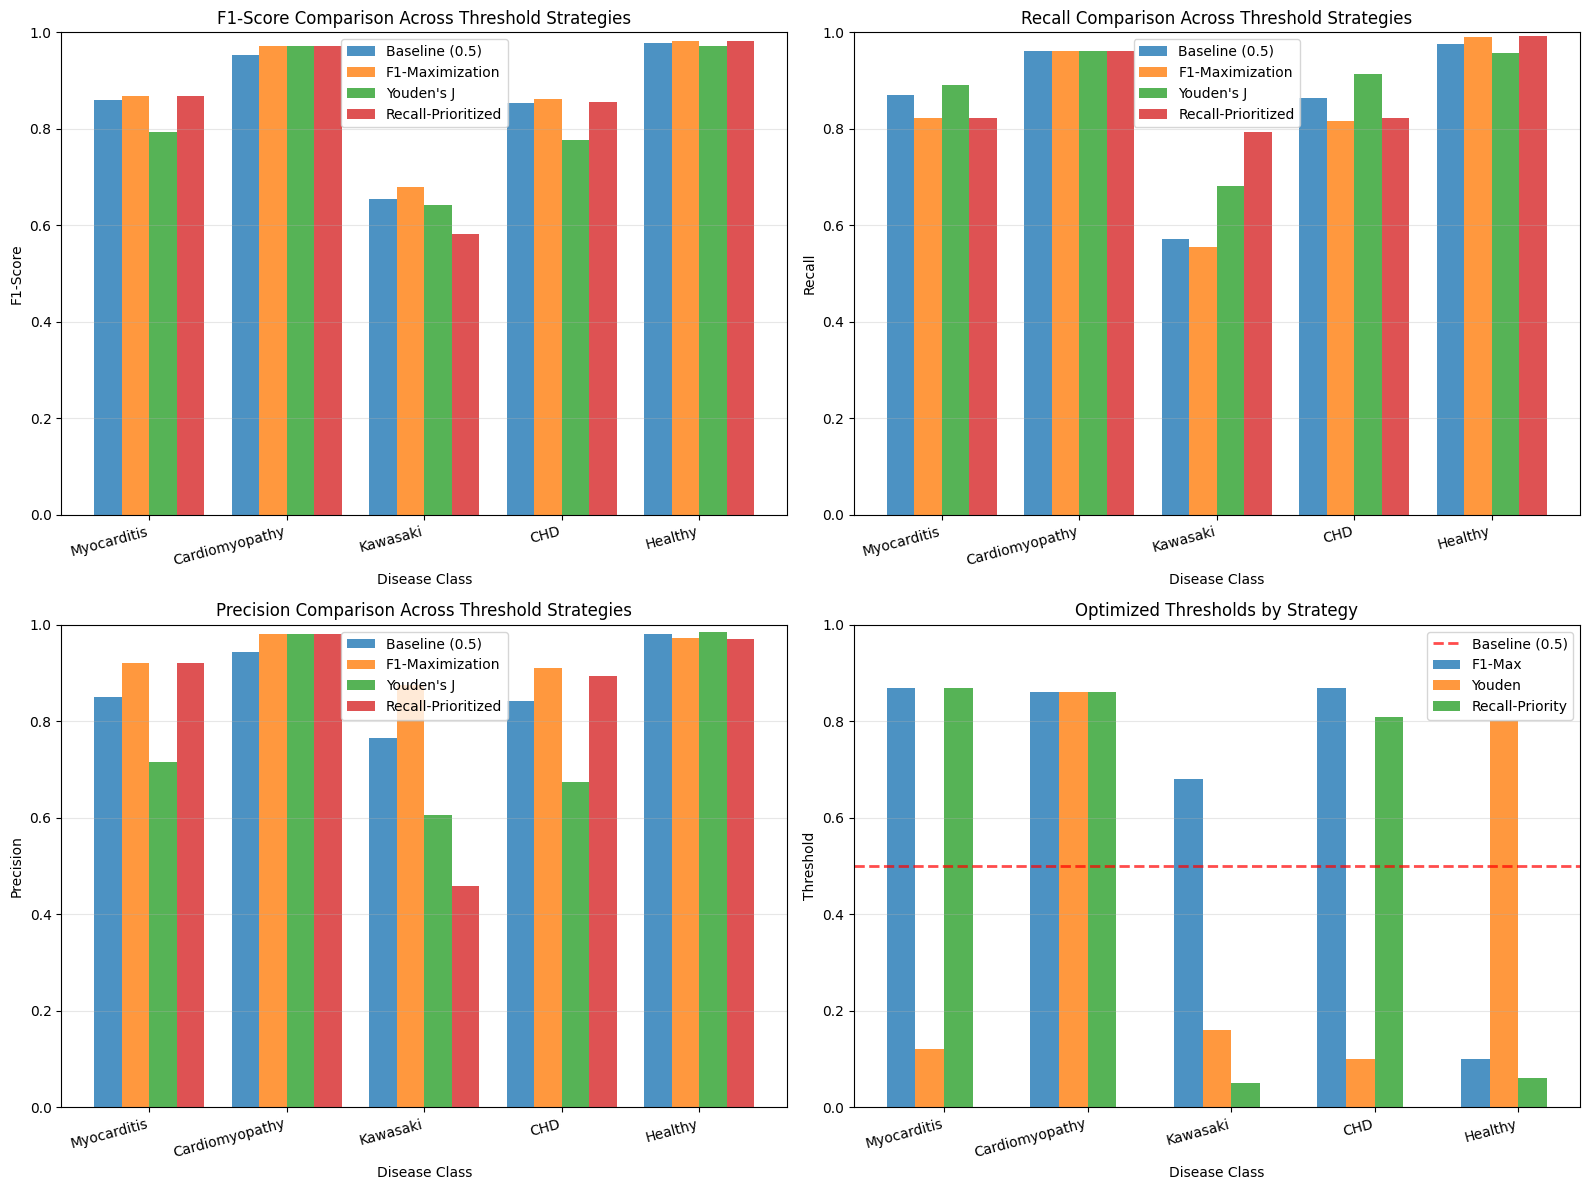

In [42]:
# Visualization 1: Per-class F1-Score comparison across strategies
print("Creating threshold optimization visualizations...")

fig, axes = plt.subplots(2, 2, figsize=FIGSIZE_LARGE)

# 1. F1-Score comparison (top-left)
strategies = [r['strategy'] for r in all_results]
x = np.arange(len(DISEASE_CLASSES))
width = 0.2

for i, result in enumerate(all_results):
    f1_scores = [result['per_class'][cls]['f1'] for cls in DISEASE_CLASSES]
    axes[0, 0].bar(x + i*width, f1_scores, width, label=result['strategy'], alpha=0.8)

axes[0, 0].set_xlabel('Disease Class')
axes[0, 0].set_ylabel('F1-Score')
axes[0, 0].set_title('F1-Score Comparison Across Threshold Strategies')
axes[0, 0].set_xticks(x + width * 1.5)
axes[0, 0].set_xticklabels(DISEASE_CLASSES, rotation=15, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].set_ylim([0, 1])

# 2. Recall comparison (top-right)
for i, result in enumerate(all_results):
    recall_scores = [result['per_class'][cls]['recall'] for cls in DISEASE_CLASSES]
    axes[0, 1].bar(x + i*width, recall_scores, width, label=result['strategy'], alpha=0.8)

axes[0, 1].set_xlabel('Disease Class')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].set_title('Recall Comparison Across Threshold Strategies')
axes[0, 1].set_xticks(x + width * 1.5)
axes[0, 1].set_xticklabels(DISEASE_CLASSES, rotation=15, ha='right')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')
axes[0, 1].set_ylim([0, 1])

# 3. Precision comparison (bottom-left)
for i, result in enumerate(all_results):
    precision_scores = [result['per_class'][cls]['precision'] for cls in DISEASE_CLASSES]
    axes[1, 0].bar(x + i*width, precision_scores, width, label=result['strategy'], alpha=0.8)

axes[1, 0].set_xlabel('Disease Class')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision Comparison Across Threshold Strategies')
axes[1, 0].set_xticks(x + width * 1.5)
axes[1, 0].set_xticklabels(DISEASE_CLASSES, rotation=15, ha='right')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].set_ylim([0, 1])

# 4. Optimized thresholds (bottom-right)
for i, (strategy_name, thresholds) in enumerate([
    ('F1-Max', optimal_thresholds['f1_max']),
    ('Youden', optimal_thresholds['youden']),
    ('Recall-Priority', optimal_thresholds['recall_priority'])
]):
    threshold_values = [thresholds[cls] for cls in DISEASE_CLASSES]
    axes[1, 1].bar(x + i*width, threshold_values, width, label=strategy_name, alpha=0.8)

# Add baseline threshold line
axes[1, 1].axhline(y=0.5, color='red', linestyle='--', linewidth=2, label='Baseline (0.5)', alpha=0.7)

axes[1, 1].set_xlabel('Disease Class')
axes[1, 1].set_ylabel('Threshold')
axes[1, 1].set_title('Optimized Thresholds by Strategy')
axes[1, 1].set_xticks(x + width * 1.5)
axes[1, 1].set_xticklabels(DISEASE_CLASSES, rotation=15, ha='right')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].set_ylim([0, 1])

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, f'threshold_optimization_{timestamp}.png'), dpi=DPI, bbox_inches='tight')
print(f"✓ Threshold optimization comparison saved")
plt.show()

In [43]:
# Display comparison tables
print("\n" + "="*80)
print("COMPARISON: GLOBAL METRICS")
print("="*80)
print(f"\n{'Strategy':<25} {'Hamming':>10} {'Exact':>10} {'Jaccard':>10} {'Micro-F1':>10} {'Macro-F1':>10}")
print("-" * 80)

for result in all_results:
    gm = result['global_metrics']
    print(f"{result['strategy']:<25} {gm['hamming_loss']:>10.4f} {gm['exact_match']:>10.4f} "
          f"{gm['subset_accuracy']:>10.4f} {gm['micro_f1']:>10.4f} {gm['macro_f1']:>10.4f}")

print("\n" + "="*80)
print("COMPARISON: PER-CLASS METRICS")
print("="*80)

for cls in DISEASE_CLASSES:
    print(f"\n{cls}:")
    print(f"{'Strategy':<25} {'Threshold':>10} {'Precision':>10} {'Recall':>10} {'F1-Score':>10}")
    print("-" * 70)

    for result in all_results:
        pc = result['per_class'][cls]
        print(f"{result['strategy']:<25} {pc['threshold']:>10.3f} {pc['precision']:>10.4f} "
              f"{pc['recall']:>10.4f} {pc['f1']:>10.4f}")

print("\n" + "="*80)


COMPARISON: GLOBAL METRICS

Strategy                     Hamming      Exact    Jaccard   Micro-F1   Macro-F1
--------------------------------------------------------------------------------
Baseline (0.5)                0.0153     0.9597     0.9601     0.9616     0.8599
F1-Maximization               0.0134     0.9653     0.9661     0.9664     0.8725
Youden's J                    0.0233     0.9352     0.9425     0.9423     0.8310
Recall-Prioritized            0.0144     0.9572     0.9641     0.9643     0.8518

COMPARISON: PER-CLASS METRICS

Myocarditis:
Strategy                   Threshold  Precision     Recall   F1-Score
----------------------------------------------------------------------
Baseline (0.5)                 0.500     0.8494     0.8699     0.8595
F1-Maximization                0.870     0.9216     0.8217     0.8688
Youden's J                     0.120     0.7157     0.8916     0.7940
Recall-Prioritized             0.870     0.9216     0.8217     0.8688

Cardiomyopathy:
St

---

## 📊 Visualizations

Generate comprehensive visualizations of model performance.


Creating evaluation visualizations...
✓ ROC curves saved


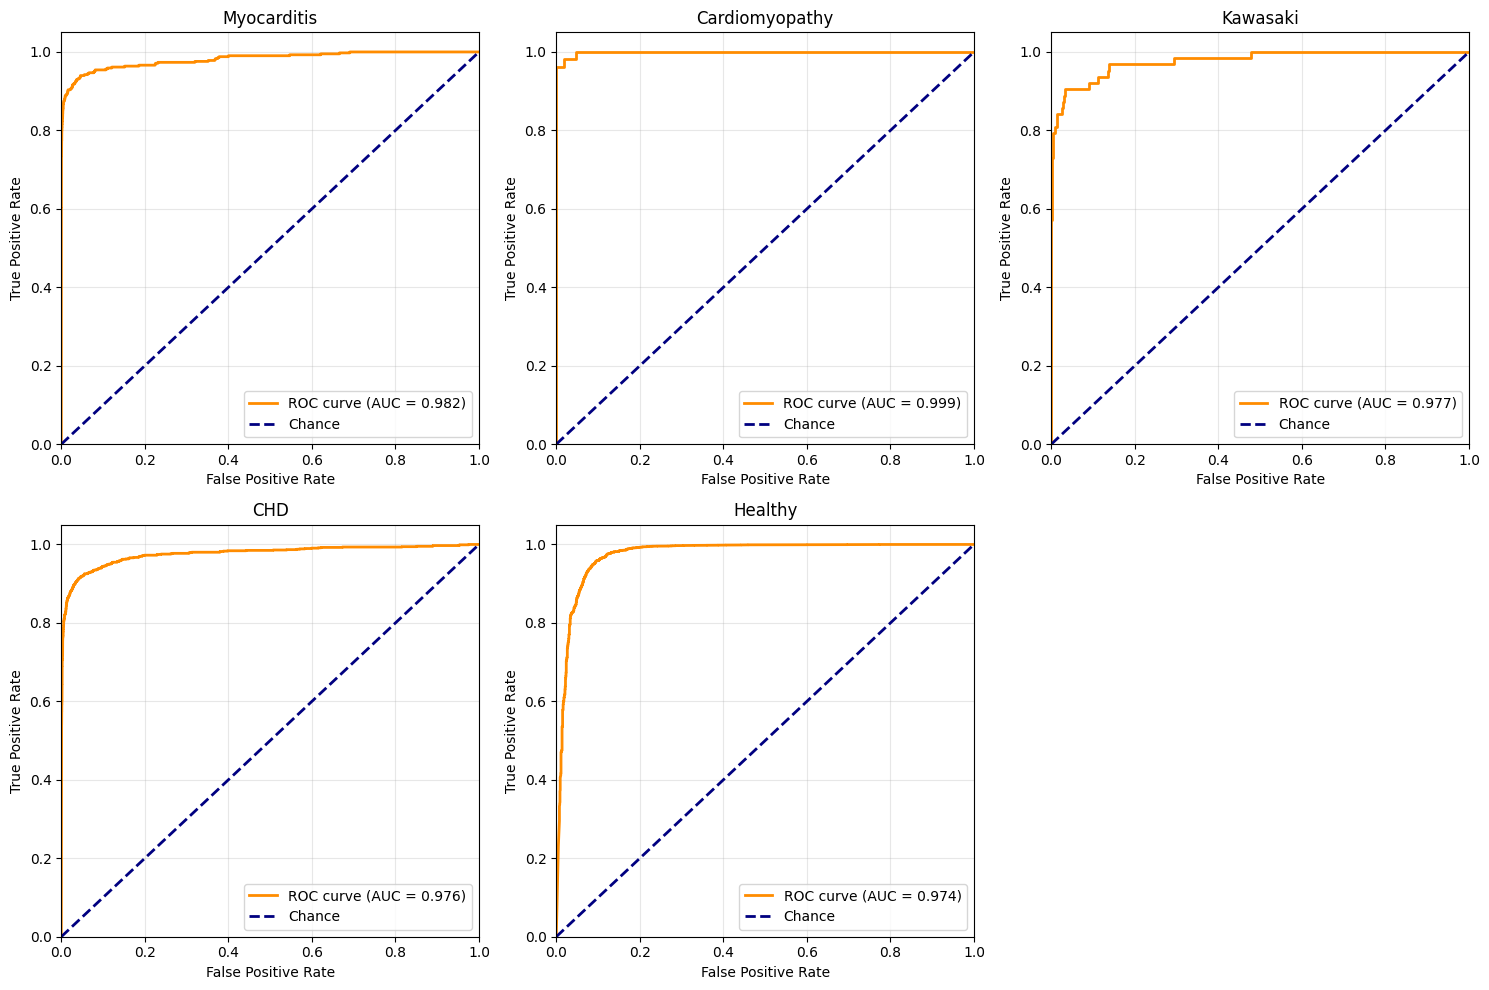

✓ Confusion matrices saved


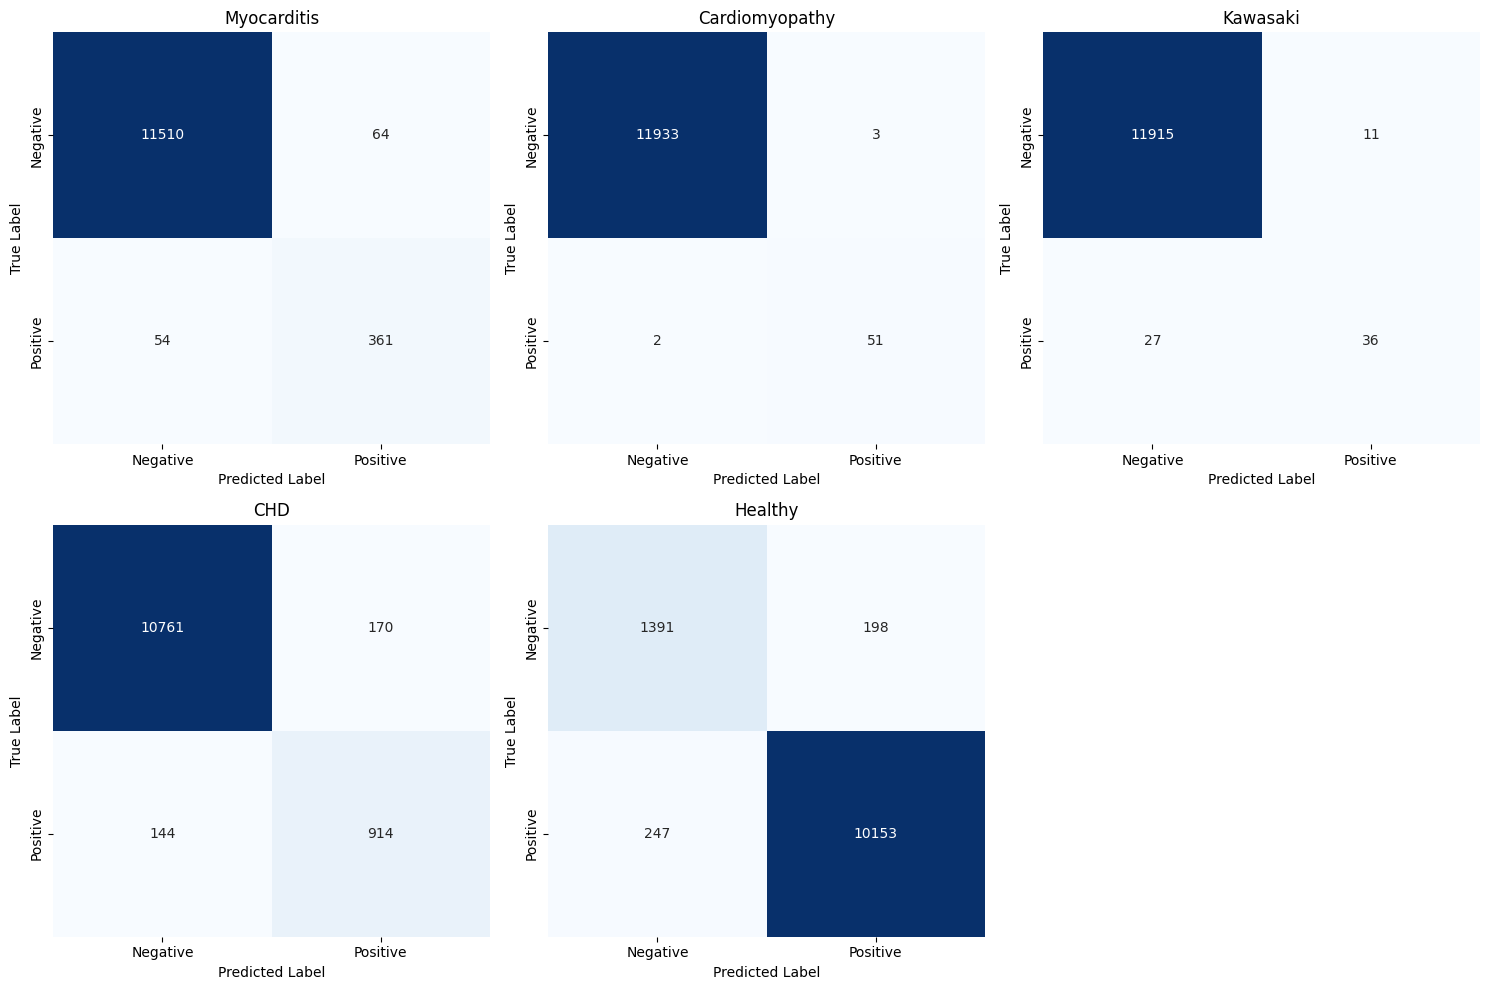

✓ Metrics summary saved


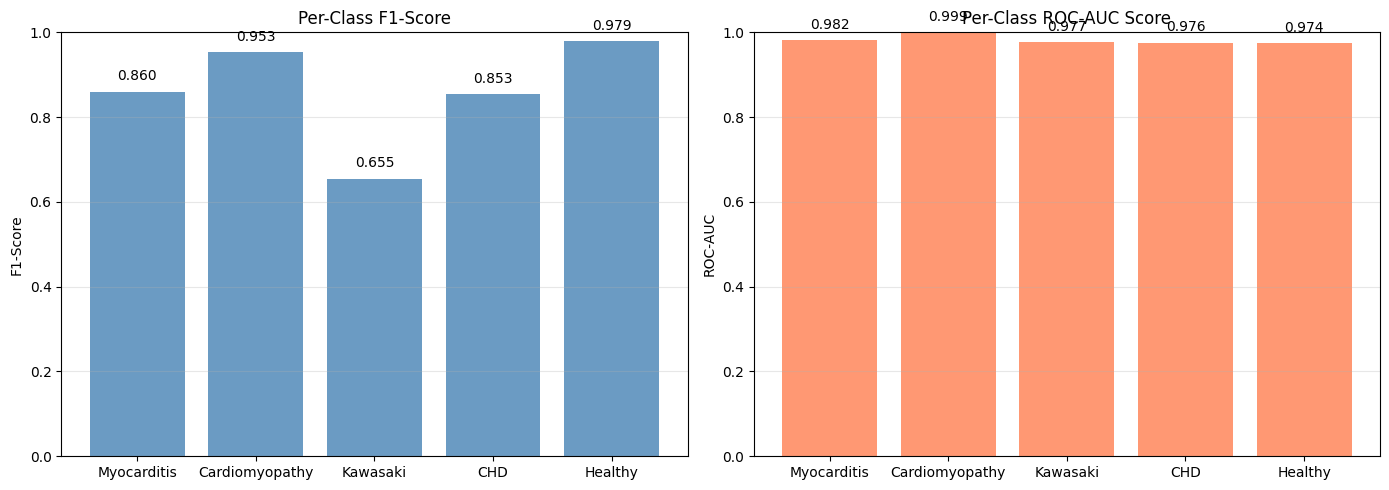

✓ All evaluation visualizations created


In [44]:
# Evaluation Visualizations
print("Creating evaluation visualizations...")

# 1. ROC Curves per class
fig, axes = plt.subplots(2, 3, figsize=FIGSIZE_ROC)
axes = axes.flatten()

all_fpr = []
all_tpr = []
all_roc_auc = []

for i, cls in enumerate(DISEASE_CLASSES):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)

    all_fpr.append(fpr)
    all_tpr.append(tpr)
    all_roc_auc.append(roc_auc)

    axes[i].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    axes[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(f'{cls}')
    axes[i].legend(loc="lower right")
    axes[i].grid(True, alpha=0.3)

# Remove extra subplot
axes[-1].axis('off')

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, f'roc_curves_{timestamp}.png'), dpi=DPI, bbox_inches='tight')
print(f"✓ ROC curves saved")
plt.show()

# 2. Confusion Matrices per class
fig, axes = plt.subplots(2, 3, figsize=FIGSIZE_ROC)
axes = axes.flatten()

for i, cls in enumerate(DISEASE_CLASSES):
    cm = confusion_matrix(y_test[:, i], y_pred[:, i])
    if cm.size == 4:
        tn, fp, fn, tp = cm.ravel()
    else:
        tn, fp, fn, tp = cm[0, 0], 0, 0, cm[1, 1] if cm.shape[0] > 1 else 0

    # Normalize for better visualization
    cm_display = np.array([[tn, fp], [fn, tp]])

    sns.heatmap(cm_display, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                cbar=False, xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    axes[i].set_title(f'{cls}')
    axes[i].set_ylabel('True Label')
    axes[i].set_xlabel('Predicted Label')

# Remove extra subplot
axes[-1].axis('off')

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, f'confusion_matrices_{timestamp}.png'), dpi=DPI, bbox_inches='tight')
print(f"✓ Confusion matrices saved")
plt.show()

# 3. Metrics summary bar chart
fig, axes = plt.subplots(1, 2, figsize=FIGSIZE_MEDIUM)

# Per-class F1 scores
f1_scores = [per_class_results[cls]['f1'] for cls in DISEASE_CLASSES]
axes[0].bar(DISEASE_CLASSES, f1_scores, color='steelblue', alpha=0.8)
axes[0].set_ylabel('F1-Score')
axes[0].set_title('Per-Class F1-Score')
axes[0].set_ylim([0, 1])
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(f1_scores):
    axes[0].text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom')

# Per-class ROC-AUC
roc_aucs = [per_class_results[cls]['roc_auc'] for cls in DISEASE_CLASSES]
axes[1].bar(DISEASE_CLASSES, roc_aucs, color='coral', alpha=0.8)
axes[1].set_ylabel('ROC-AUC')
axes[1].set_title('Per-Class ROC-AUC Score')
axes[1].set_ylim([0, 1])
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(roc_aucs):
    axes[1].text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, f'metrics_summary_{timestamp}.png'), dpi=DPI, bbox_inches='tight')
print(f"✓ Metrics summary saved")
plt.show()

print("✓ All evaluation visualizations created")

### Save Predictions & Results


In [45]:
# Save predictions and comprehensive results
np.savez(
    os.path.join(RESULTS_DIR, f"predictions_{timestamp}.npz"),
    y_true=y_test,
    y_pred=y_pred,
    y_probs=y_pred_probs
)

# Save comprehensive results JSON
results = {
    'timestamp': timestamp,
    'disease_classes': DISEASE_CLASSES,
    'epochs_trained': len(history.history['loss']),
    'test_samples': len(y_test),

    # Global metrics
    'global_metrics': {
        'hamming_loss': float(hamming),
        'exact_match_accuracy': float(exact_match),
        'subset_accuracy': float(subset_accuracy),
        'micro_f1': float(micro_f1),
        'macro_f1': float(macro_f1),
        'mean_roc_auc': float(np.mean(roc_auc_scores))
    },

    # Per-class metrics
    'per_class_metrics': {
        cls: {
            'precision': float(per_class_results[cls]['precision']),
            'recall': float(per_class_results[cls]['recall']),
            'f1_score': float(per_class_results[cls]['f1']),
            'roc_auc': float(per_class_results[cls]['roc_auc']),
            'support': int(per_class_results[cls]['support'])
        }
        for cls in DISEASE_CLASSES
    }
}

# Save results
with open(os.path.join(RESULTS_DIR, f"results_{timestamp}.json"), "w") as f:
    json.dump(results, f, indent=2)

# Save results summary as CSV
results_df = pd.DataFrame([
    {
        'Class': cls,
        'Precision': per_class_results[cls]['precision'],
        'Recall': per_class_results[cls]['recall'],
        'F1-Score': per_class_results[cls]['f1'],
        'ROC-AUC': per_class_results[cls]['roc_auc'],
        'Support': per_class_results[cls]['support']
    }
    for cls in DISEASE_CLASSES
])

results_df.to_csv(os.path.join(RESULTS_DIR, f"evaluation_metrics_{timestamp}.csv"), index=False)

print(f"\n✓ Results saved to {RESULTS_DIR}")
print(f"  - predictions_{timestamp}.npz (y_true, y_pred, y_probs)")
print(f"  - results_{timestamp}.json (comprehensive metrics)")
print(f"  - evaluation_metrics_{timestamp}.csv (per-class metrics table)")
print(f"  - model_{timestamp}.keras (trained model)")
print(f"  - roc_curves_{timestamp}.png")
print(f"  - confusion_matrices_{timestamp}.png")
print(f"  - metrics_summary_{timestamp}.png")


✓ Results saved to ./results/
  - predictions_20251127_081239.npz (y_true, y_pred, y_probs)
  - results_20251127_081239.json (comprehensive metrics)
  - evaluation_metrics_20251127_081239.csv (per-class metrics table)
  - model_20251127_081239.keras (trained model)
  - roc_curves_20251127_081239.png
  - confusion_matrices_20251127_081239.png
  - metrics_summary_20251127_081239.png


## Upload results to HuggingFace

In [46]:

api = HfApi()

try:
    api.upload_folder(
        folder_path=RESULTS_DIR,  # "./results/"
        repo_id="Neural-Network-Project/ECG-models",
        repo_type="model",
        path_in_repo="training_results",
        commit_message=f"Training results - {datetime.now().strftime('%Y%m%d_%H%M%S')}"
    )
    print("✓ Results successfully uploaded to HuggingFace!")
    print("View at: https://huggingface.co/Neural-Network-Project/ECG-models")
except Exception as e:
    print(f"❌ Upload failed: {str(e)}")

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...del_20251127_080822.keras:   9%|8         |  532kB / 5.99MB            

  ...del_20251127_081239.keras:   9%|8         |  532kB / 5.99MB            

  ...tions_20251127_081239.npz:   9%|8         | 85.2kB /  960kB            

  ...urves_20251127_081239.png:   9%|8         | 14.2kB /  159kB            

  ...ation_20251127_081239.png:   9%|8         | 14.0kB /  157kB            

✓ Results successfully uploaded to HuggingFace!
View at: https://huggingface.co/Neural-Network-Project/ECG-models
